<a href="https://colab.research.google.com/github/georgywasiat/Convolutional-Neural-Network-CNN-for-Rock-Paper-Scissors-Recognition/blob/main/Rock_Paper_Scissors_Image_Classification_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Georgy Banny Rizky Wasiat

In [ ]:
import os
import shutil
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/Portofolio/rockpaperscissors"
base_dir = "/content/drive/My Drive/Portofolio/rockpaperscissors"

Mounted at /content/drive


In [ ]:
os.listdir(dataset_path)

['scissors', 'paper', 'rock']

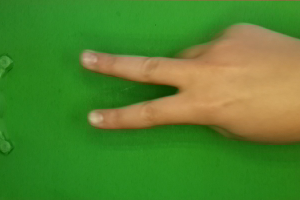

Label: scissors


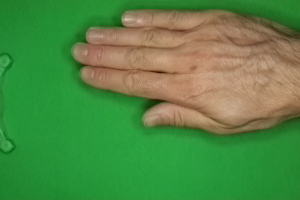

Label: paper


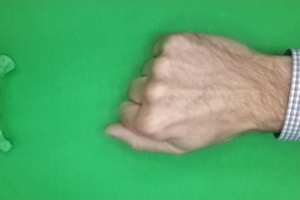

Label: rock


In [ ]:
from IPython.display import Image, display

# List sub-direktori atau file dalam dataset_path
subdirectories = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Iterasi melalui setiap sub-direktori dan menampilkan satu gambar dari setiap sub-direktori
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(dataset_path, subdirectory)

    # Ambil satu file gambar dari setiap sub-direktori
    image_files = [f for f in os.listdir(subdirectory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        # Ambil satu gambar pertama dari setiap sub-direktori
        sample_image_path = os.path.join(subdirectory_path, image_files[0])

        # Menampilkan gambar dengan keterangan
        display(Image(filename=sample_image_path, width=200, height=200))
        print(f"Label: {subdirectory}")

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        shuffle=True,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/20
32/32 - 478s - loss: 1.0890 - accuracy: 0.4416 - val_loss: 0.9012 - val_accuracy: 0.5859 - 478s/epoch - 15s/step
Epoch 2/20
32/32 - 143s - loss: 0.5667 - accuracy: 0.7656 - val_loss: 0.4976 - val_accuracy: 0.8203 - 143s/epoch - 4s/step
Epoch 3/20
32/32 - 99s - loss: 0.3867 - accuracy: 0.8431 - val_loss: 0.3315 - val_accuracy: 0.8828 - 99s/epoch - 3s/step
Epoch 4/20
32/32 - 51s - loss: 0.2666 - accuracy: 0.9054 - val_loss: 0.1997 - val_accuracy: 0.9297 - 51s/epoch - 2s/step
Epoch 5/20
32/32 - 31s - loss: 0.1899 - accuracy: 0.9396 - val_loss: 0.2767 - val_accuracy: 0.9141 - 31s/epoch - 981ms/step
Epoch 6/20
32/32 - 28s - loss: 0.1978 - accuracy: 0.9316 - val_loss: 0.3702 - val_accuracy: 0.8672 - 28s/epoch - 868ms/step
Epoch 7/20
32/32 - 19s - loss: 0.1889 - accuracy: 0.9276 - val_loss: 0.3382 - val_accuracy: 0.9102 - 19s/epoch - 608ms/step
Epoch 8/20
32/32 - 19s - loss: 0.1648 - accuracy: 0.9487 - val_loss: 0.1802 - val_accuracy: 0.9531 - 19s/epoch - 589ms/step
Epoch 9/20
32/3

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Saving Foto Gunting.jpg to Foto Gunting.jpg
1/1 [==============================] - 0s 21ms/step
Foto Gunting.jpg
scissors


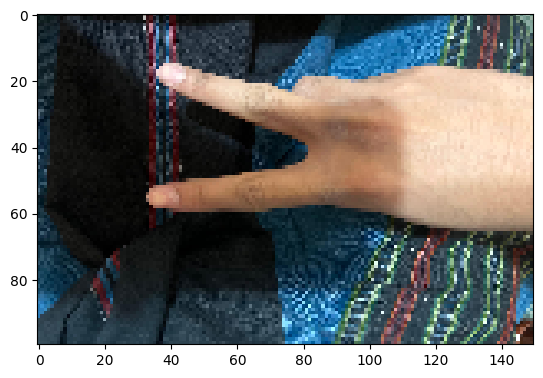

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # Memprediksi Gambar
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')